In [95]:
import tensorflow as tf
import numpy as np
import os
import cv2
from skimage.io import imread

In [114]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the CNN architecture
def create_model(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv3D(4, (3, 3, 3), padding='same', activation='relu', input_shape=input_shape))
    #model.add(tf.keras.layers.Conv3D(32, (3, 3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv3D(4, (3, 3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv3D(1, (3, 3, 3), padding='same'))
    return model

# Define the loss function
def mse_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(lr=1e-2)

In [115]:
# Load the corrupted images and ground truth images
corrupted_dir = r"D:\images\deep-learning\simulation1\train\input"
ground_truth_dir = r"D:\images\deep-learning\simulation1\train\ground truth"
corrupted_files = os.listdir(corrupted_dir)
ground_truth_files = os.listdir(ground_truth_dir)

In [116]:
# Preprocess the images
X_train = []
Y_train = []
for i in range(len(corrupted_files)):
    # Load the corrupted image and ground truth image
    corrupted_img = imread(os.path.join(corrupted_dir, corrupted_files[i]), plugin='tifffile')
    ground_truth_img = imread(os.path.join(ground_truth_dir, ground_truth_files[i]), plugin='tifffile')
    # Resize the images to the desired size
    #corrupted_img = np.reshape(corrupted_img, (256, 256, 100, 1))
    #ground_truth_img = np.reshape(ground_truth_img, (256, 256, 100, 1))
    
    corrupted_img = corrupted_img[..., np.newaxis]
    ground_truth_img = ground_truth_img[..., np.newaxis]
    
    print(corrupted_img.min(), corrupted_img.max())
    print(ground_truth_img.min(), ground_truth_img.max())
    # Normalize the pixel values to [0, 1]
    corrupted_img = (corrupted_img.astype('float32')-corrupted_img.min()) / (corrupted_img.max() - corrupted_img.min())
    ground_truth_img = (ground_truth_img.astype('float32')-ground_truth_img.min()) / (ground_truth_img.max() - ground_truth_img.min()) 
    # Append the preprocessed images to the training set
    X_train.append(corrupted_img)
    Y_train.append(ground_truth_img)
X_train = np.array(X_train)
Y_train = np.array(Y_train)

0.0 68.0
0.0 200.0
0.0 76.0
0.0 200.0
0.0 76.0
0.0 200.0
0.0 79.0
0.0 200.0


In [117]:
# Define the input shape of the model
input_shape = X_train[0].shape

# Create the model
model = create_model(input_shape)

# Compile the model
model.compile(loss=mse_loss, optimizer=optimizer)

# Train the model
model.fit(X_train, Y_train, batch_size=16, epochs=25, validation_split=0.2)

# Save the model
model.save('restoration_model.h5')

Epoch 1/25
1/1 [==============================] - 16s 16s/step - loss: 0.0162 - val_loss: 0.0253
Epoch 2/25
1/1 [==============================] - 15s 15s/step - loss: 0.0135 - val_loss: 0.0251
Epoch 3/25
1/1 [==============================] - 15s 15s/step - loss: 0.0132 - val_loss: 0.0254
Epoch 4/25
1/1 [==============================] - 15s 15s/step - loss: 0.0129 - val_loss: 0.0233
Epoch 5/25
1/1 [==============================] - 15s 15s/step - loss: 0.0119 - val_loss: 0.0205
Epoch 6/25
1/1 [==============================] - 15s 15s/step - loss: 0.0109 - val_loss: 0.0188
Epoch 7/25
1/1 [==============================] - 15s 15s/step - loss: 0.0096 - val_loss: 0.0178
Epoch 8/25
1/1 [==============================] - 15s 15s/step - loss: 0.0088 - val_loss: 0.0154
Epoch 9/25
1/1 [==============================] - 15s 15s/step - loss: 0.0076 - val_loss: 0.0150
Epoch 10/25
1/1 [==============================] - 15s 15s/step - loss: 0.0075 - val_loss: 0.0130
Epoch 11/25
1/1 [============

(86, 256, 256, 1) 0.0 1.0
(86, 256, 256, 1) 0.0 1.0


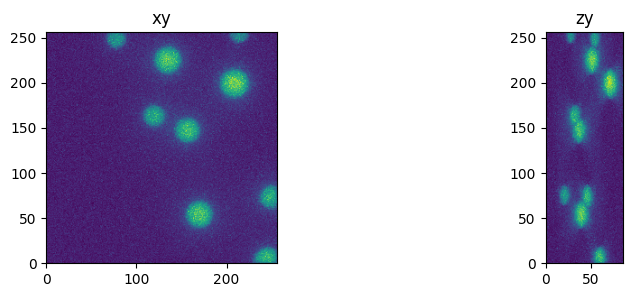

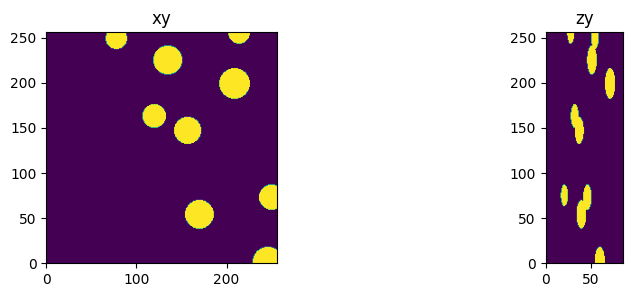

In [118]:
from tnia.plotting.projections import show_xy_zy_max

n=0

print(X_train[n].shape, X_train[n].min(), X_train[n].max())
fig = show_xy_zy_max(np.squeeze(X_train[[n]]))
print(Y_train[n].shape, Y_train[n].min(), Y_train[n].max())
fig = show_xy_zy_max(np.squeeze(Y_train[n]))

1/1 [==============================] - 0s 429ms/step
(1, 86, 256, 256, 1)


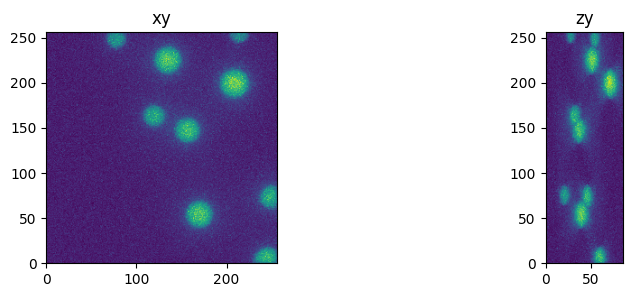

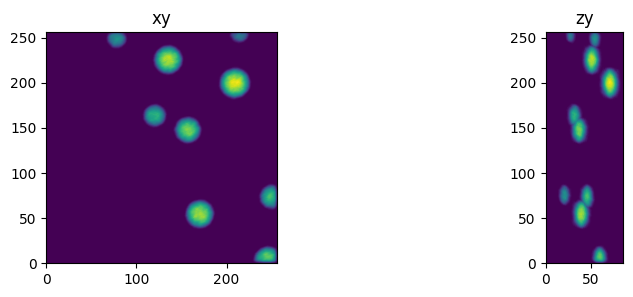

In [119]:
#output = model.predict(X_train[0])
input = X_train[n].reshape(1, 86, 256, 256, 1)
output = model.predict(input)
print(output.shape)
fig = show_xy_zy_max(np.squeeze(input))
fig = show_xy_zy_max(np.squeeze(output))

(86, 256, 256, 1) 0.0 1.0
-0.054212343 0.051616944


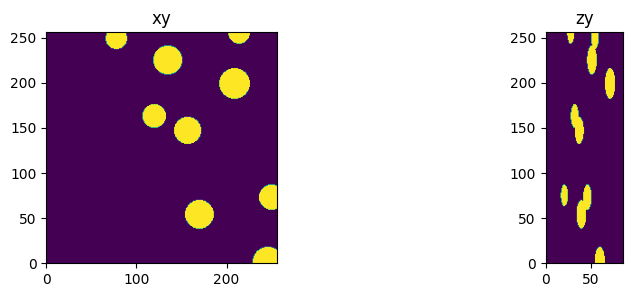

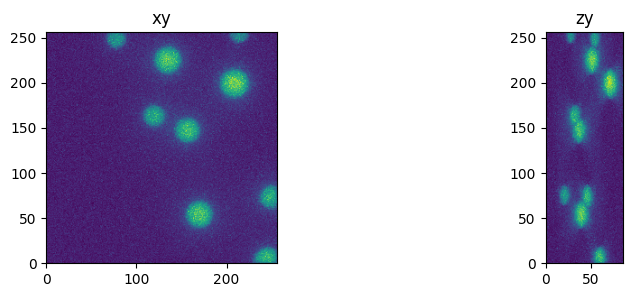

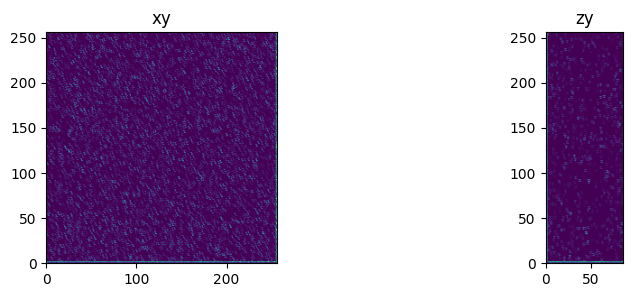

In [102]:
test=np.squeeze(output)
print(Y_train[n].shape, Y_train[n].min(), Y_train[n].max())
print(test.min(), test.max())
#test=test-test.min()
fig = show_xy_zy_max(Y_train[n])
fig = show_xy_zy_max(X_train[n])
fig = show_xy_zy_max(test)

In [55]:
test.min(), test.max()

(0.0, 0.39403412)

In [69]:
import napari
viewer = napari.Viewer()
viewer.add_image(np.squeeze(X_train[1]), name='corrupted')
viewer.add_image(np.squeeze(Y_train[1]), name='ground truth')
viewer.add_image(test, name='restored')

<Image layer 'restored' at 0x2af2f988f70>

In [20]:
X_train[0].shape

(86, 256, 256, 1)

In [21]:
test.shape

(1, 86, 256, 256, 3)

In [22]:
Y_train[0].shape

(86, 256, 256, 1)